In [26]:

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sc
from numpy import random
#import getpass #just needed for sql import
#import sqlalchemy as sa #just needed for sql import
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
from matplotlib import pyplot
from numpy import sqrt
from numpy import log
from array import array

### Data Cleaning

In [3]:
#cleaning the state names
def st_clean(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        states= {'Arizona' : 'AZ', 
                 'California': 'CA',
                 'Nevada' : 'NV', 
                 'Cali' :'CA,', 
                 'Oregon':'OR', 
                 'AZ' :'AZ', 
                 'WA':'WA',
                 'Washington':'WA',
                 'Cali':'CA'}
        
        return states[x]

In [4]:
#cleaning the gender names
def gender_clean(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        g = {'F': 'F', 
                 'M' : 'M', 
                 'Femal': 'F',
                 'Male' : 'M', 
                 'female' :'F'}
        
        return g[x]

In [6]:
#change states into regions
def state_region(x):
    if not x == x:
    #then i know that x is = none
        return x
    else:
        region= {'AZ': 'Central', 
                  'CA': 'West',
                 'NV': 'Central', 
                 'OR':'North_West', 
                  'AZ':'Central', 
                 'WA':'East'}
        
        return region[x]

In [7]:
# loading csv into dataframe
def load_data(path):
    return pd.read_csv(path)

In [8]:
#cleaning

def clean_data(df):
    df.columns=[e.lower().replace(' ', '_') for e in df.columns] #all columns in lower case
    df=df.drop(columns=['unnamed:_0', 'vehicle_type',"customer"]) #dropping useless columns
    #df=df[df['income']>0]
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'], errors='coerce') # change format of date
    df["month"]=list(map(lambda date:date.strftime(format="%B"),df["effective_to_date"])) #get frm effective_to_date just the months
    df=df.drop(columns=['effective_to_date']) #dropping not anymore needed column
    df["state"] = df["state"].apply(st_clean)
    df["gender"] = df["gender"].apply(gender_clean)
    df =df.drop_duplicates()
    df['customer_lifetime_value'].fillna(df["customer_lifetime_value"].mean(),inplace=True) # filling empty cells with the mean
    df['income'].fillna(df["income"].mean(),inplace=True)
    df['monthly_premium_auto'].fillna(df["monthly_premium_auto"].mean(),inplace=True)
    df['total_claim_amount'].fillna(df["total_claim_amount"].mean(),inplace=True)
    df['number_of_open_complaints'].fillna(df["number_of_open_complaints"].mean(),inplace=True)
    df =df.dropna() #drop if any cell is empty
    df = df.reset_index(drop=True) #reset index
    return df

def transform_data(df):
    df["total_claim_amount"]=round(df["total_claim_amount"],0) #remove decimals
    df["customer_lifetime_value"]=round(df["customer_lifetime_value"],0) #remove decimals
    df["number_of_open_complaints"]=round(df['number_of_open_complaints'],0) #remove decimals
    df["state"] = df["state"].apply(state_region) # change states into region
    df.vehicle_class[df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
    df.vehicle_class[df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
    df.policy[df.policy.isin(["Personal L3","Personal L2","Personal L1"]) ] = "Personal"
    df.policy[df.policy.isin(["Corporate L3","Corporate L2","Corporate L1"]) ] = "Corporate"
    df.policy[df.policy.isin(["Special L3","Special L2","Special L1"]) ] = "Special"
    df.number_of_policies[df.number_of_policies>2]=3
    return df

In [11]:
customer_df =load_data("Data_Marketing_Customer_Analysis.csv")

In [12]:
customer_df = clean_data(customer_df)
customer_df = transform_data(customer_df)

<ipython-input-8-d23a8e7c650a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.vehicle_class[df.vehicle_class.isin(["Luxury Car","Luxury SUV"])] = "Luxury Car"
<ipython-input-8-d23a8e7c650a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.vehicle_class[df.vehicle_class.isin(["Four-Door Car","SUV"])] = "Four-Door Car"
<ipython-input-8-d23a8e7c650a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.policy[df.policy.isin(["Pe

In [13]:
customer_df.head(10)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,Central,4809.0,No,Basic,College,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,3,Corporate Auto,Corporate,Offer3,Agent,293.0,Four-Door Car,Medsize,February
1,West,2229.0,No,Basic,College,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal,Offer4,Call Center,745.0,Four-Door Car,Medsize,January
2,East,14948.0,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal,Offer3,Call Center,480.0,Four-Door Car,Medsize,February
3,North_West,22332.0,Yes,Extended,College,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate,Offer2,Branch,484.0,Four-Door Car,Medsize,January
4,West,5035.0,No,Basic,Doctor,Employed,F,37405,Urban,Married,63,8.0,99,3.0,3,Corporate Auto,Corporate,Offer2,Branch,288.0,Four-Door Car,Medsize,February
5,West,4956.0,No,Basic,High School or Below,Employed,M,87197,Urban,Single,63,35.0,45,0.0,3,Personal Auto,Personal,Offer2,Branch,247.0,Two-Door Car,Medsize,February
6,West,5990.0,Yes,Premium,College,Employed,M,66839,Suburban,Single,154,33.0,24,0.0,1,Personal Auto,Personal,Offer2,Branch,739.0,Sports Car,Medsize,January
7,North_West,17114.0,No,Extended,Master,Employed,F,70961,Suburban,Married,85,19.0,8,0.0,2,Corporate Auto,Corporate,Offer2,Agent,408.0,Four-Door Car,Small,January
8,Central,5155.0,No,Extended,High School or Below,Employed,M,82730,Urban,Married,127,13.0,31,0.0,1,Corporate Auto,Corporate,Offer2,Branch,443.0,Four-Door Car,Large,January
9,North_West,19955.0,No,Extended,High School or Below,Employed,F,69096,Rural,Married,99,24.0,32,0.0,2,Corporate Auto,Corporate,Offer1,Agent,65.0,Four-Door Car,Medsize,January


In [14]:
### Plotting the Correlation Map

<AxesSubplot:>

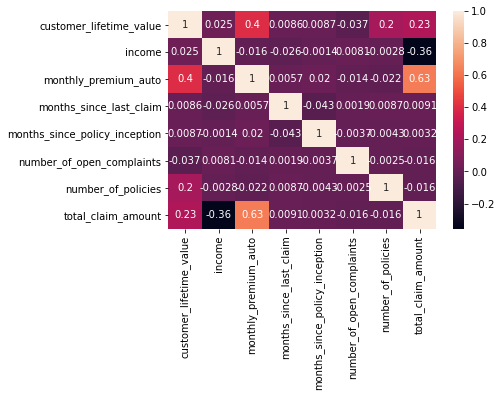

In [15]:
Var_Corr = customer_df.corr()
sns.heatmap(Var_Corr,annot=True)

In [16]:
def train_test(df, dependent_column):
    
    data = df.select_dtypes(include=np.number)
    
    data = data.drop(dependent_column, axis =1)
    y =  df[dependent_column]

    #standardizing the data and scaling
    scaler = StandardScaler()
    scaler.fit(data)  
    x = scaler.transform(data) 
    x = pd.DataFrame(x, columns = data.columns) 
    display(data.head(2))
    print()
    display(x.head(2))
    
    # test_train
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)
    
    lm = LinearRegression()
    model = lm.fit(x_train,y_train)
    predicted_y = model.predict(x_test)
    predicted_train_y = model.predict(x_train)
    print("Coefficient: ", model.coef_)
    print()
    print("Intercept: ", model.intercept_)

In [17]:
train_test(customer_df,'total_claim_amount')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,4809.0,48029,61,7.0,52,0.0,3
1,2229.0,0,64,3.0,26,0.0,1


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,-0.465260,0.341247,-0.937002,-0.803724,0.141352,-0.423521,1.111832
1,-0.840939,-1.237094,-0.849684,-1.200663,-0.790051,-0.423521,-1.201841


Coefficient:  [-6.97442564e+00 -1.02770618e+02  1.89791654e+02 -3.38706306e+00
 -5.35319413e+00 -1.25381241e-01  9.63505981e-01]

Intercept:  434.7351499542117


### Data Transformation


In [19]:
# Getting numerical data

numerical = customer_df.select_dtypes(include = np.number)
print(numerical)

      customer_lifetime_value  income  monthly_premium_auto  \
0                      4809.0   48029                    61   
1                      2229.0       0                    64   
2                     14948.0   22139                   100   
3                     22332.0   49078                    97   
4                      5035.0   37405                    63   
...                       ...     ...                   ...   
8966                   2772.0   59855                    74   
8967                  19228.0       0                   187   
8968                   5259.0   61146                    65   
8969                  23893.0   39837                   201   
8970                  11972.0   64195                   158   

      months_since_last_claim  months_since_policy_inception  \
0                         7.0                             52   
1                         3.0                             26   
2                        34.0                      

In [20]:
# Getting categorical data

categorical = customer_df.select_dtypes(include = np.object)
print(categorical)

           state response  coverage             education employmentstatus  \
0        Central       No     Basic               College         Employed   
1           West       No     Basic               College       Unemployed   
2           East       No     Basic              Bachelor         Employed   
3     North_West      Yes  Extended               College         Employed   
4           West       No     Basic                Doctor         Employed   
...          ...      ...       ...                   ...              ...   
8966     Central       No     Basic               College         Employed   
8967     Central       No     Basic  High School or Below       Unemployed   
8968  North_West       No     Basic               College         Employed   
8969     Central       No  Extended              Bachelor         Employed   
8970        West       No   Premium               College         Employed   

     gender location_code marital_status     policy_type     po

<ipython-input-20-78e5c7ea27ce>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = customer_df.select_dtypes(include = np.object)


In [28]:
### Validating Data Model

In [32]:
X=numerical.drop('total_claim_amount', axis=1)
y=numerical.total_claim_amount

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
3298,12169.0,14973,115,2.0,75,0.0,2
8828,12817.0,28651,67,4.0,25,0.0,2
8705,3237.0,0,90,19.0,91,0.0,1
450,5308.0,0,145,29.0,70,0.0,1
6087,2711.0,31998,69,31.0,70,0.0,1
...,...,...,...,...,...,...,...
5734,2832.0,70037,70,6.0,61,0.0,1
5191,3158.0,46655,82,27.0,20,0.0,1
5390,31317.0,42522,132,3.0,85,0.0,2
860,4602.0,84394,114,9.0,38,0.0,1


In [35]:
# Linear Regressor
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.4753752818153466
Root Mean Squared Error: 209.84454394414817
